# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-23 16:00:05.220744


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/22/20


,12/22/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,18230242,322765,1.77
Brazil,7318821,188259,2.57
India,10099066,146444,1.45
Mexico,1338426,119495,8.93
Italy,1977370,69842,3.53
United Kingdom,2116609,68409,3.23
France,2547577,61821,2.43


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/22/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
59133,US,17844690,2020-12-20,317668.0,1509.0,189099.0,215761.285714
59132,US,17655591,2020-12-19,316159.0,2549.0,196295.0,216053.142857
59131,US,17459296,2020-12-18,313610.0,2821.0,249709.0,219324.285714
59130,US,17209587,2020-12-17,310789.0,3346.0,236211.0,217094.857143
59129,US,16973376,2020-12-16,307443.0,3682.0,247403.0,215733.857143
59128,US,16725973,2020-12-15,303761.0,2984.0,198766.0,212285.285714
59127,US,16527207,2020-12-14,300777.0,1484.0,192846.0,215309.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/22/20


,12/22/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,866765,36724.0,4.24
Texas,1626614,26117.0,1.61
California,1958508,23239.0,1.19
Florida,1223015,20754.0,1.70
New Jersey,440366,18326.0,4.16
Illinois,911308,16671.0,1.83
Pennsylvania,576787,14197.0,2.46


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/22/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
2013,California,1884033,2020-12-20,22675.0,93.0,41476.0,42665.000000
2012,California,1842557,2020-12-19,22582.0,212.0,40362.0,41911.571429
2011,California,1802195,2020-12-18,22370.0,276.0,48221.0,40854.285714
2010,California,1753974,2020-12-17,22094.0,277.0,45415.0,38774.714286
2009,California,1708559,2020-12-16,21817.0,397.0,63817.0,37081.714286
2008,California,1644742,2020-12-15,21420.0,276.0,33249.0,32763.714286
2007,California,1611493,2020-12-14,21144.0,104.0,26115.0,31523.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/22/20


,12/22/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,647542,9016.0,1.39
Riverside,151713,1789.0,1.18
Orange,130444,1779.0,1.36
San Bernardino,168307,1387.0,0.82
San Diego,132098,1311.0,0.99
Sacramento,57082,774.0,1.36
Fresno,58568,646.0,1.10


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/22/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6381,Los Angeles,623670,2020-12-20,8875.0,58.0,13298.0,14026.285714
6380,Los Angeles,610372,2020-12-19,8817.0,60.0,13651.0,13928.571429
6379,Los Angeles,596721,2020-12-18,8757.0,93.0,16396.0,13583.714286
6378,Los Angeles,580325,2020-12-17,8664.0,96.0,14320.0,13201.142857
6377,Los Angeles,566005,2020-12-16,8568.0,137.0,22236.0,12962.000000
6376,Los Angeles,543769,2020-12-15,8431.0,86.0,11039.0,11064.000000
6375,Los Angeles,532730,2020-12-14,8345.0,47.0,7244.0,10692.857143
6374,Los Angeles,525486,2020-12-13,8298.0,29.0,12614.0,10805.000000
6373,Los Angeles,512872,2020-12-12,8269.0,70.0,11237.0,10494.857143
6372,Los Angeles,501635,2020-12-11,8199.0,50.0,13718.0,10150.285714



7 day new US cases as of 12/22/20


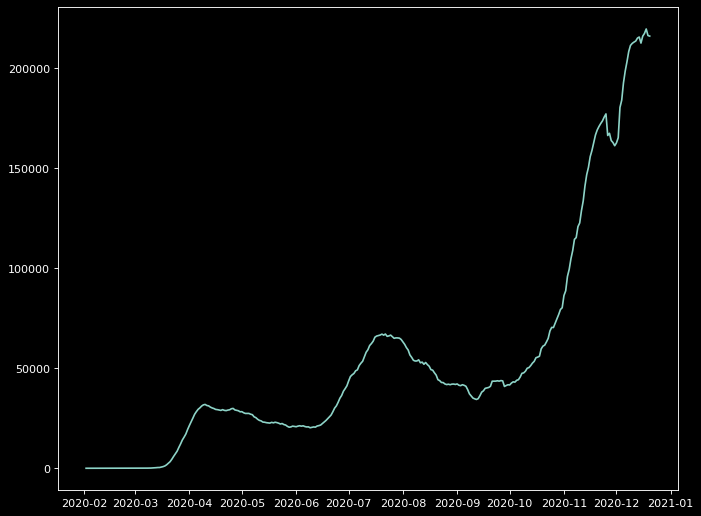

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/22/20


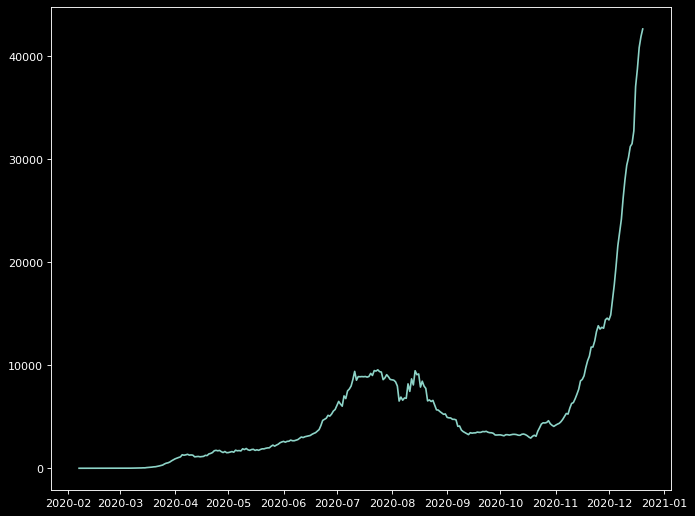

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/22/20


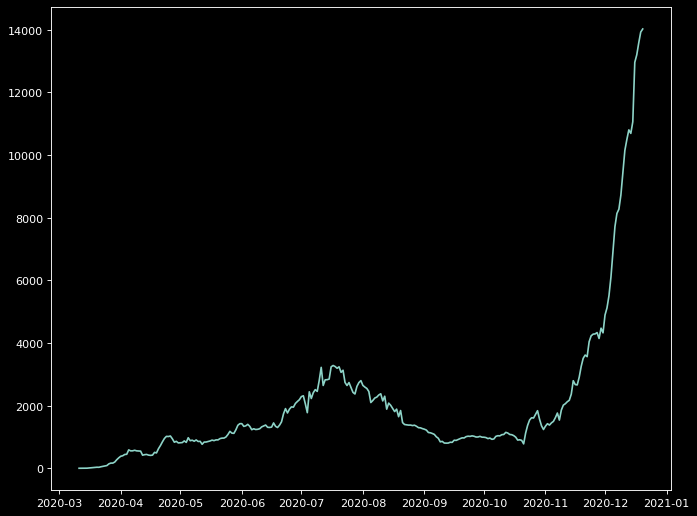

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()